In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150
train = pd.read_csv('C:/Users/User/Documents/boot camp - study/github/hojeong-project/필사 스터디/house hold/train.csv')
test = pd.read_csv('C:/Users/User/Documents/boot camp - study/github/hojeong-project/필사 스터디/house hold/test.csv')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


## EDA

### integer columns

Text(0.5, 1.0, 'count fo uinque values in integer columns')

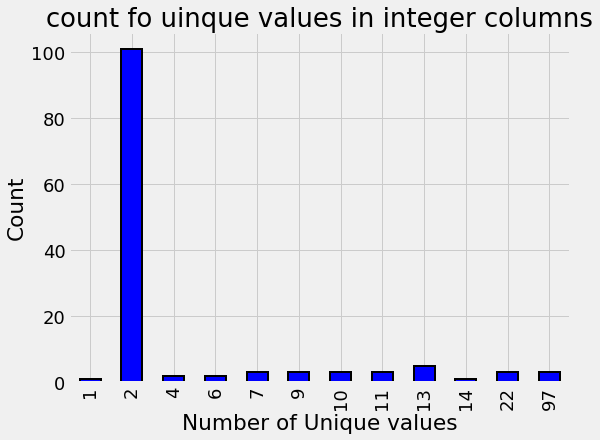

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2)
# int자료형인 칼럼들의 고유값이 몇개인지 value_counts() 했을때 2개의 카테고리를 가지는게 가장 많았음
plt.xlabel('Number of Unique values')
plt.ylabel('Count')
plt.title('count fo uinque values in integer columns')

### float columns

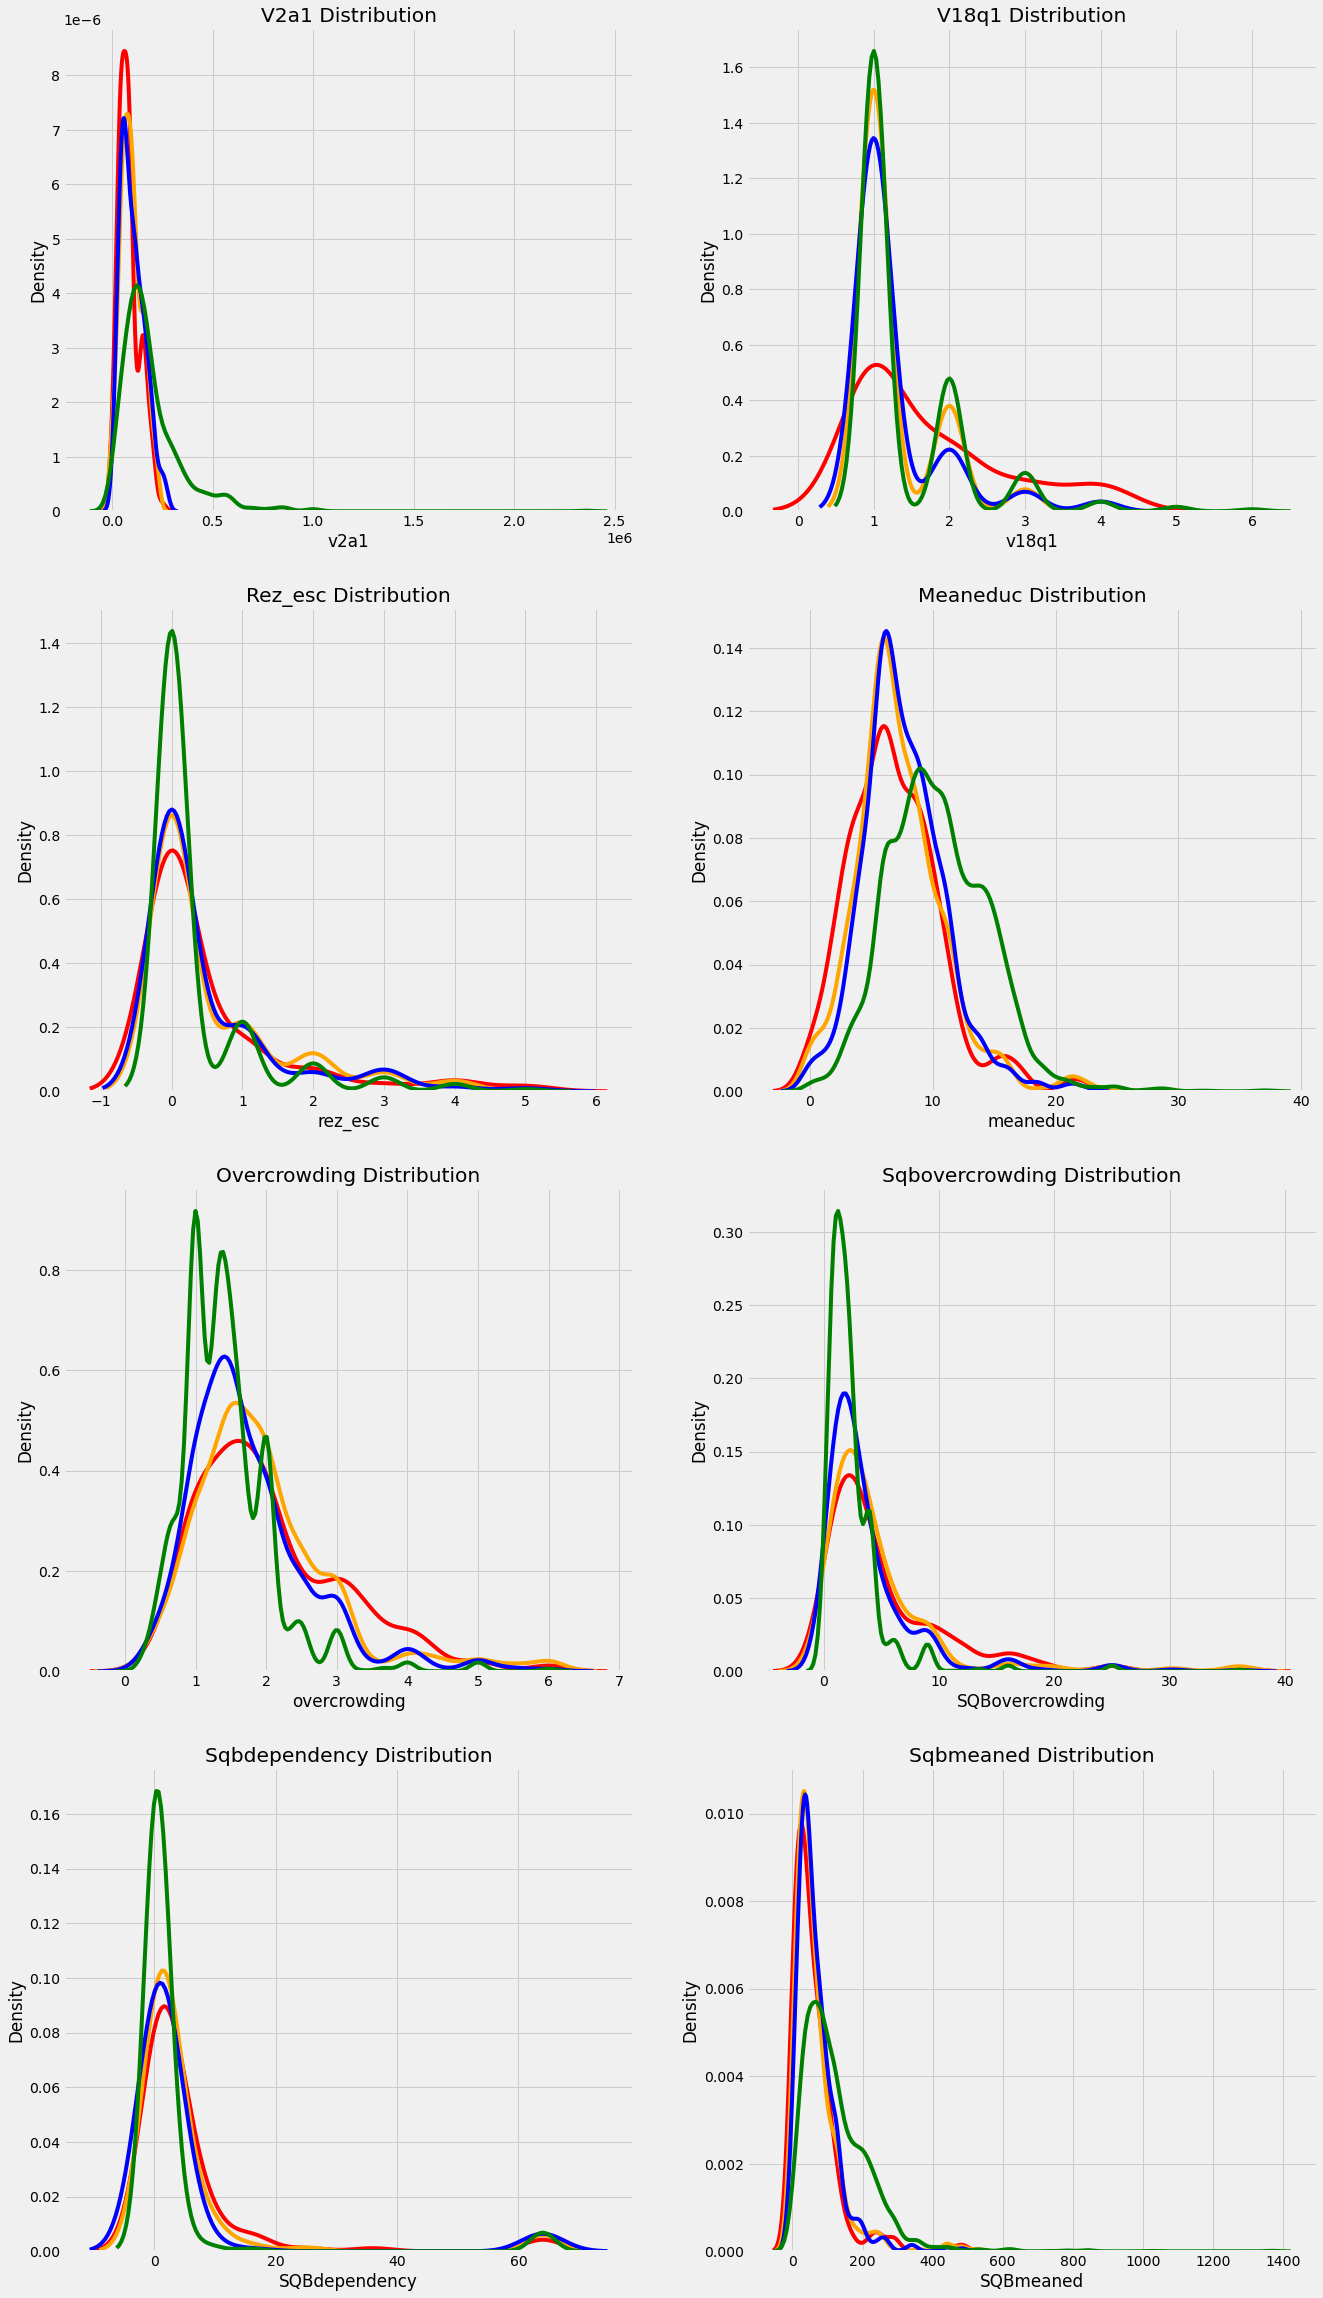

In [6]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# color mapping  
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}) # 컬러 매칭 
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'}) # 빈곤도 매칭

for i , col in enumerate(train.select_dtypes('float')): # float 형들만 가져와서
    ax = plt.subplot(4,2,i+1)
    for poverty_level , color in colors.items(): # 빈곤도 level , color 가져옴
        sns.kdeplot(train.loc[train['Target']==poverty_level,col].dropna(), # 타겟이 빈곤도 level 인 col만 
                    ax = ax , color = color , label = poverty_mapping[poverty_level]) # 빈곤도 level에 따른 빈곤 매칭
        
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top = 2)
# 평균 교육에 따라 빈곤이 적다는것 짐작 

### objecet columns

In [7]:
train.select_dtypes('object').head()
# dependency -> (19세 미만 또는 64세 이상 가구원 수)/(19세 이상 64세 미만 가구원 수)
# edjefa -> 남자 가장 수년간 교육 
# edjefe -> 여자 가장의 수년간 교육 

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [8]:
mapping = {'yes':1 , 'no':0}

for df in [train, test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)


train[['dependency', 'edjefa', 'edjefe']].describe()
## object 변수의 describe를 봄 


,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


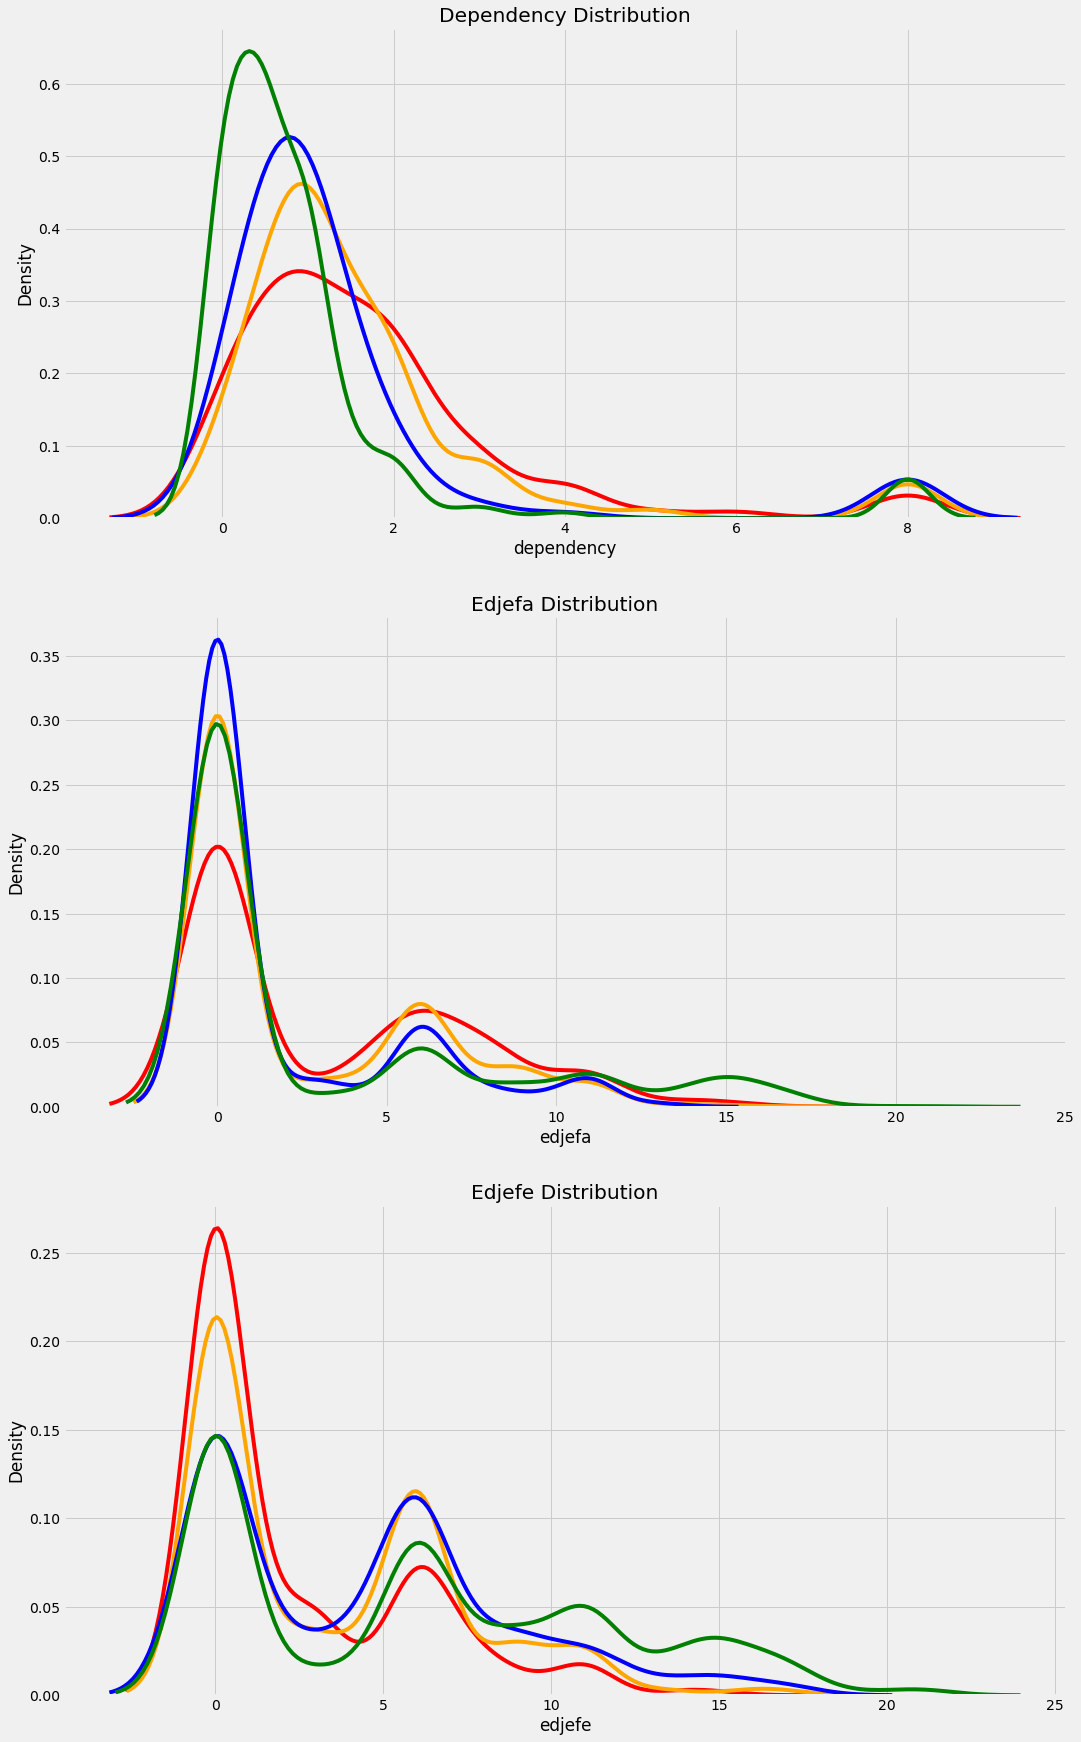

In [9]:
plt.figure(figsize = (16, 12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    for poverty_level, color in colors.items():

        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [125]:
test['Target'] = np.nan
data = train.append(test,ignore_index= True)

C:\Users\User\AppData\Local\Temp\ipykernel_5752\4252220512.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test,ignore_index= True)


### label distribution exploring

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

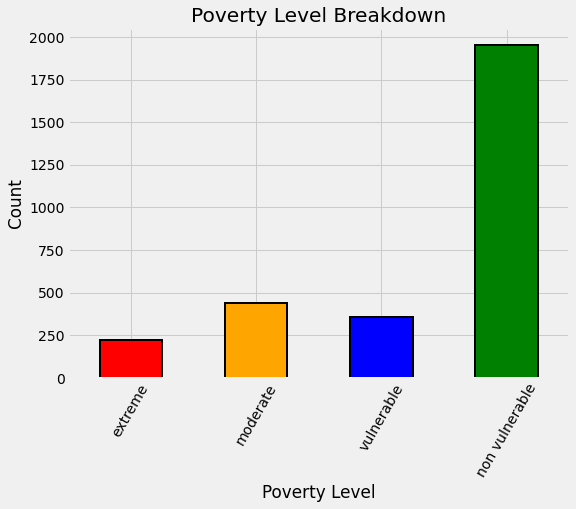

In [11]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]
# target 이 null 이 아니면서 가구주인경우 2개 칼럼만 뽑음

label_counts = train_labels['Target'].value_counts().sort_index()
# traget_value_counts 뽑아냄 

label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)


plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts


In [12]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# 가장이 없는 가구 찾는다 
not_equal = all_equal[all_equal != True]
print('가장이 없는 가구 {}.'.format(len(not_equal)))

가장이 없는 가구 85.


In [16]:
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [17]:
not_equal

idhogar
0172ab1d9    False
03f4e5f4d    False
0511912b6    False
078a0b6e2    False
09e25d616    False
             ...  
e65d4b943    False
efd3aec61    False
f006348ed    False
f7b421c2c    False
f94589d38    False
Name: Target, Length: 85, dtype: bool

In [13]:
train[train['idhogar'] == not_equal.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [14]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [15]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique()==1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

# 가장이 없는 가정이 라벨이 다른 가치관을 가지는 것은 없으므로 고려 안해도된다

0 Households with no head have different labels.


In [ ]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & train['parentesco1']==1.0]['Target'])
    
    train.loc[train['idhogar']==household,'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]

print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


### Missing variables

In [19]:
# 결측값을 데이터 프레임으로 만들고 결측값 비율 높은것만 10개 추출
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0:'total'})

missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent',ascending=False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [20]:
# 가장에 대해서만 행 선택하고 값 카운트 표시하는 함수 
def plot_value_counts(df,col,heads_only = False):
    if heads_only:
        df=df.loc[df['parentesco1']==1].copy()
        
    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor = 'k',
                                                 linewidth = 2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

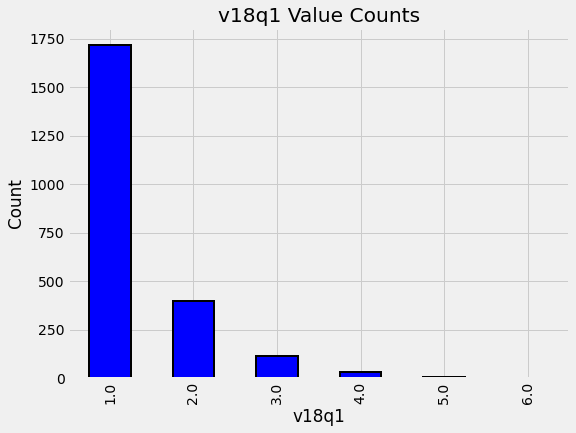

In [21]:
plot_value_counts(heads,'v18q1')

In [23]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())
# 몇개가지고 있는지 결측값에대한 가지고 있는지 없는지 여부 확인
# 결측값을 가지면 0개 맞음 

v18q
0    8044
1       0
Name: v18q1, dtype: int64

In [31]:
data['v18q1'] = data['v18q1'].fillna(0)

Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

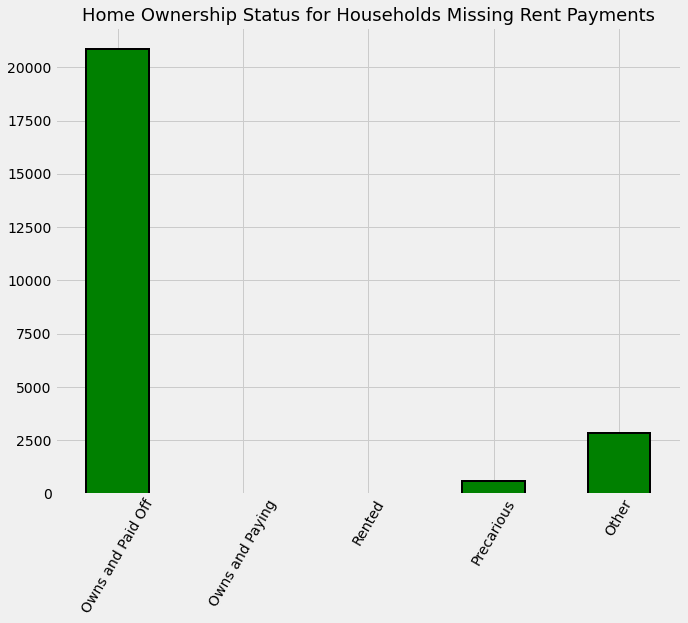

In [28]:
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),color = 'green',
                                                              edgecolor = 'k', linewidth = 2)
# 월세 납부 누락이 안된 주택 납부 소유 사람들 sum
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)

In [33]:
data.loc[(data['tipovivi1']==1),'v2a1'] = 0 # 하나있는데 전액 지불한거면 0
data['v2a1-missing'] = data['v2a1'].isnull() # 
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

In [37]:
data.loc[data['rez_esc'].notnull()]['age'].describe() # 자녀가 몇년 학교 뒤쳐졌는지

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [40]:
data.loc[data['rez_esc'].isnull()]['age'].describe() # rez_esc 없는 평균 나이

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

In [42]:
data.loc[((data['age']>19) | (data['age']<7)) & (data['rez_esc'].isnull()),'rez_esc'] = 0
data['rez_esc-missing'] = data['rez_esc'].isnull()
# 7살보다 작거나 19살보다 크고 자녀가 없는 사람은 null로 취급해라

In [43]:
data.loc[data['rez_esc']>5,'rez_esc']=5

In [45]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

TypeError: annotate() missing 1 required positional argument: 'text'

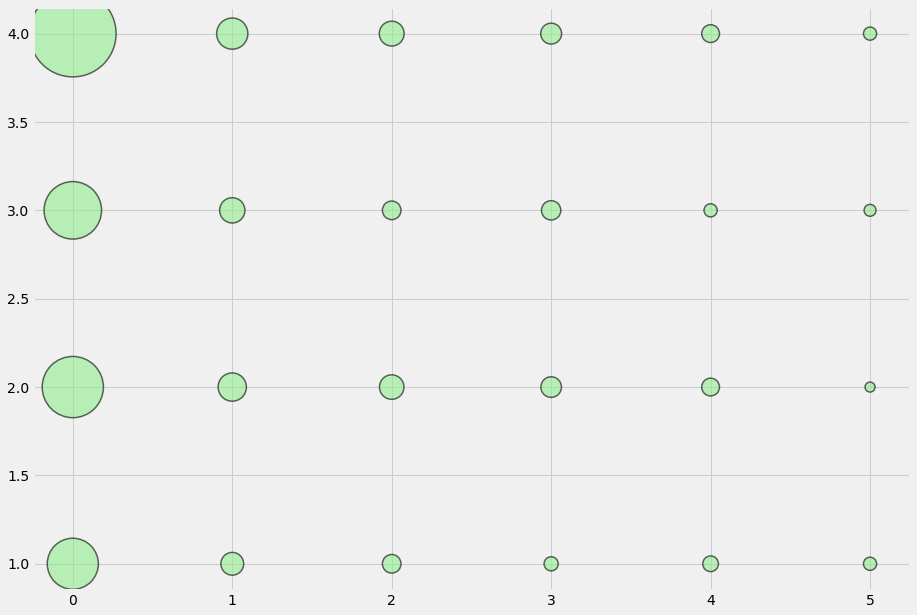

In [46]:
plot_categoricals('rez_esc','Target',data)

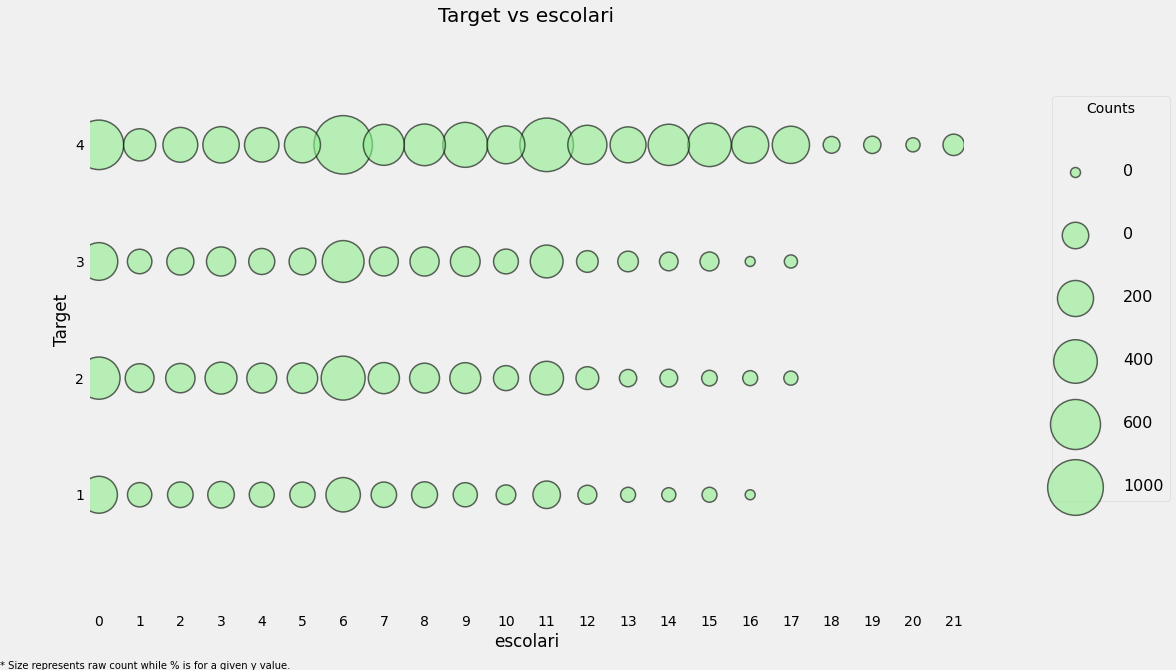

In [47]:
plot_categoricals('escolari','Target',data,annotate=False)

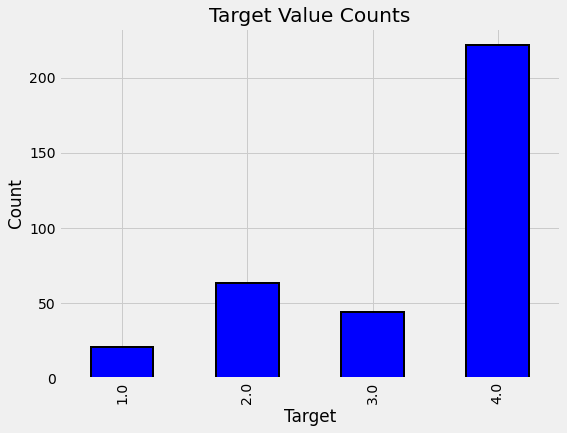

In [48]:
plot_value_counts(data[(data['rez_esc-missing']==1)],'Target')

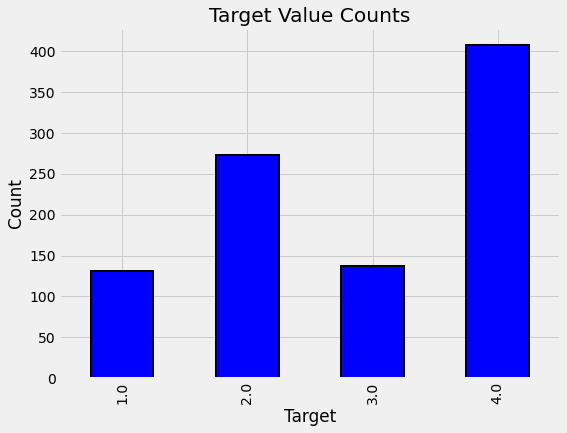

In [49]:
plot_value_counts(data[(data['v2a1-missing']==1)],'Target')

In [50]:
id_ = ['Id', 'idhogar', 'Target']

In [51]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [52]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [53]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


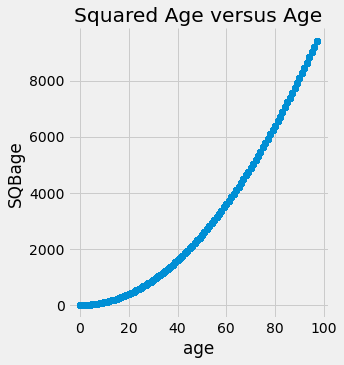

In [54]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

In [55]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

In [56]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

In [59]:
corr_matrix = heads.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
# np.triu 는 새로운 행렬 만들어줌 k=1은 0의 마디 개수가 하나씩 많아지는 개념 

to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]
# 절댓값의 상관관계가 0.95보다 높은것을 찾는다 

to_drop

C:\Users\User\AppData\Local\Temp\ipykernel_5752\615688865.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [63]:
corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9,corr_matrix['tamhog'].abs() > 0.9]
# tamhog와 쌍이 높은것들만 찾는다 

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


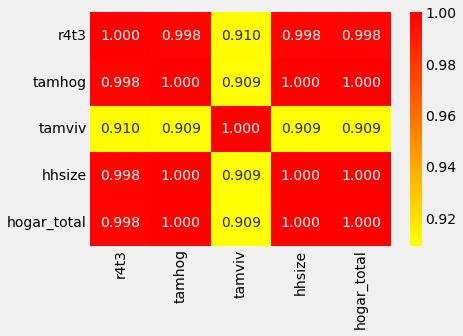

In [64]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f') # 시각화 


In [ ]:
'''r4t3-> 가구 내 총 인원
tamhog=> 가구 크기
tamviv-> 가구에 사는 사람들의 수
hhsize-> 가구 크기
hogar_total-> 가구 내 총 개인 수
는 높은 상관관계를 가지고 상관관계가 1인것들은 제거할 필요가 있음'''

In [67]:
heads = heads.drop(columns = ['tamhog','hogar_total','r4t3']) # hhsize랑 완벽한 상괸관계 변수들 제거
 

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


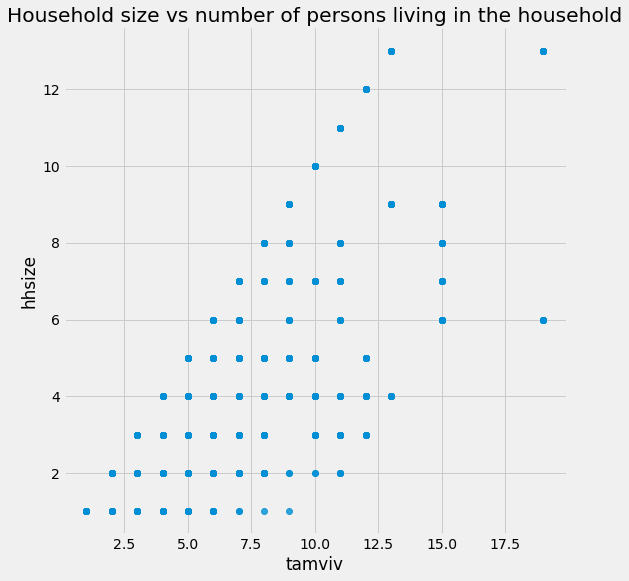

In [68]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

TypeError: annotate() missing 1 required positional argument: 'text'

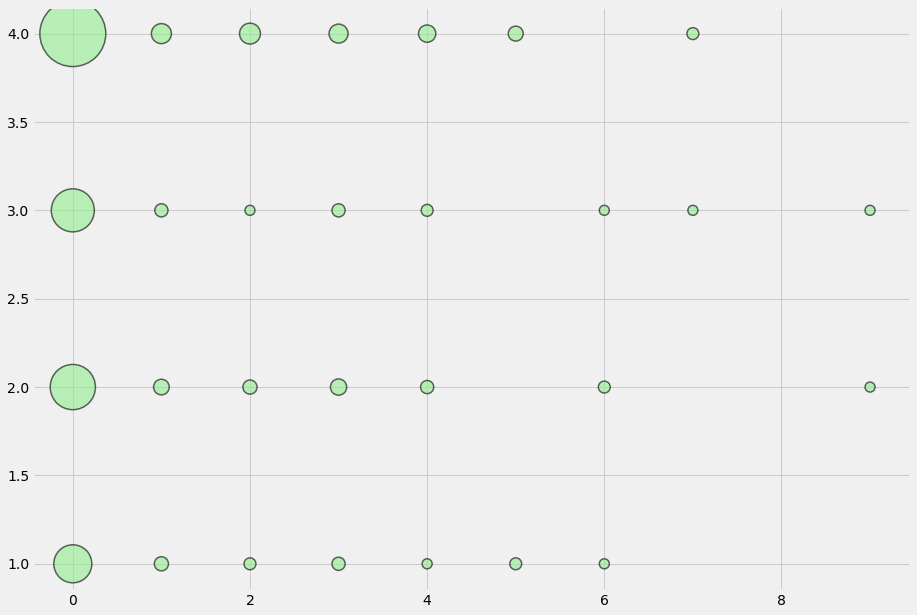

In [70]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize'] # 사람들수 -- 가구 크기 
plot_categoricals('hhsize-diff', 'Target', heads)

In [71]:
corr_matrix.loc[corr_matrix['coopele'].abs()>0.9,corr_matrix['coopele'].abs()>0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


In [74]:
elec = []

# 전기 변수들을 합쳐서 새로운 전기 변수 만듬
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()
heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

TypeError: annotate() missing 1 required positional argument: 'text'

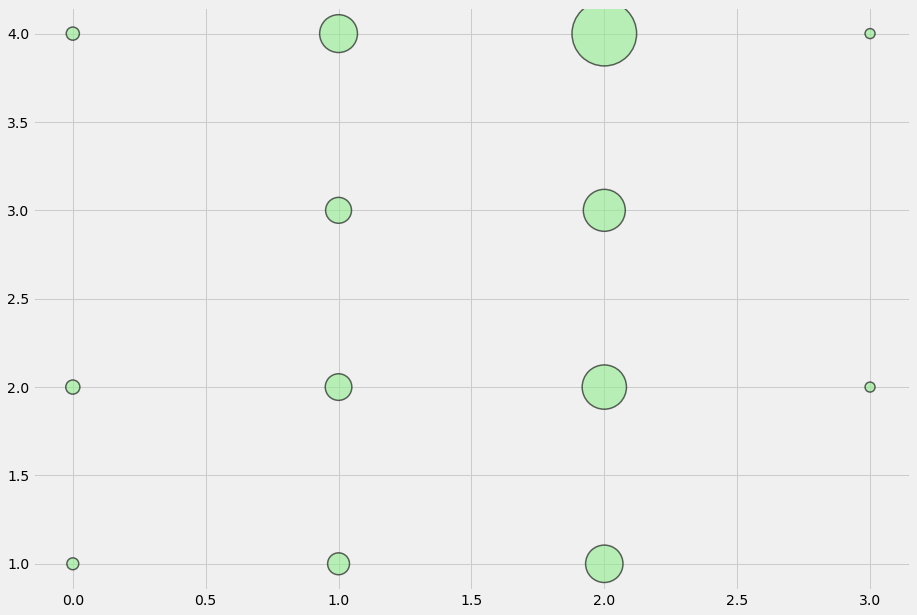

In [75]:
plot_categoricals('elec', 'Target', heads)

In [76]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True) # 도시사람들만 남김

# 도시사람은 농촌사람보다 가난 낮을것으로 예상 

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

In [79]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis = 1) 
# 벽 나쁨 , 보통 , 좋음이 있는데 이를 argmax 로 숫자화를 시킴 (나쁨 1 , 보통 2 , 좋음 3)
heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])

heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),axis = 1)
# 지붕 나쁨 , 보통 , 좋음이 있는데 이를 argmax 로 숫자화를 시킴 (나쁨 1 , 보통 2 , 좋음 3)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),axis = 1)
# 바닥 나쁨 , 보통 , 좋음이 있는데 이를 argmax 로 숫자화를 시킴 (나쁨 1 , 보통 2 , 좋음 3)
heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])


## feature 결합

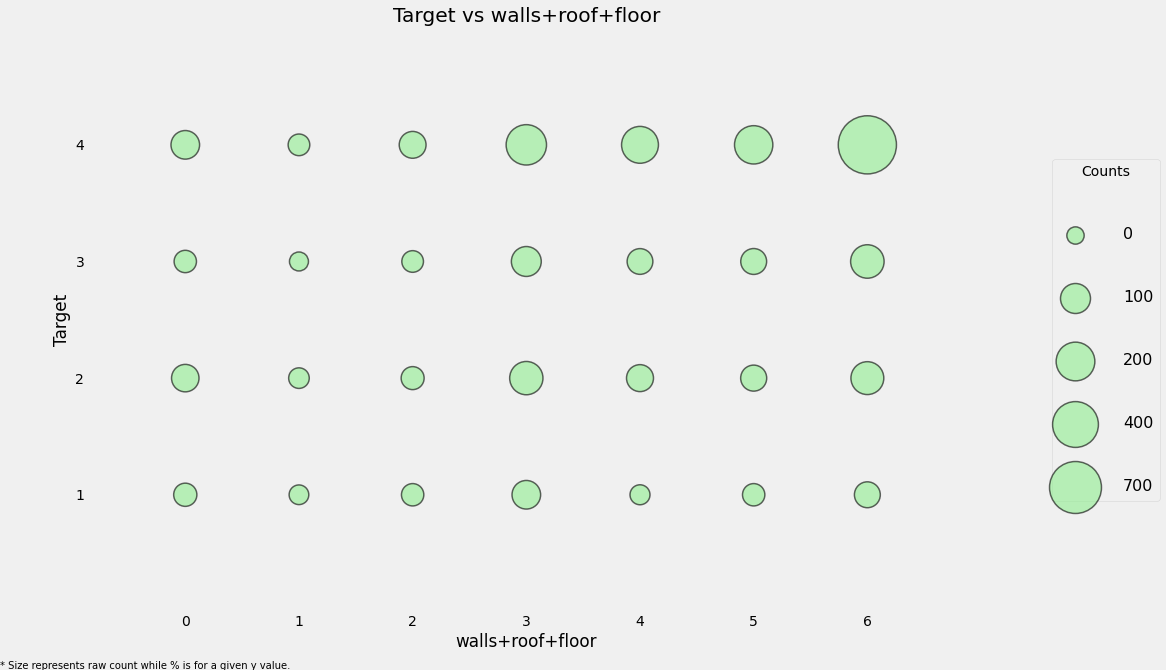

In [81]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)
# 집에 질이 좋으면 점점 커지는 경향이 있음 

In [84]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(columns={'Target':'Normalize'}).reset_index()
# 합친거별로 target을 groupby로 만든것을 데이터프레임화 하고 정규화 시킨 옵션을 추가한것을 이름을 바꾸고 reset 인덱스를하면 데이터프레임처럼 보임
counts.head(10)

,walls+roof+floor,Target,Normalize
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529
5,1,2.0,0.264706
6,1,1.0,0.220588
7,1,3.0,0.191176
8,2,4.0,0.409449
9,2,2.0,0.220472


In [89]:
heads['warning'] = 1 * (heads['sanitario1'] +  # no 화장실
                         (heads['elec'] == 0) + # no elec
                         heads['pisonotiene'] +  # no floor 
                         heads['abastaguano'] +  # no water
                         (heads['cielorazo'] == 0)) 
# 위기인 사람들 컬럼 만듬 

Text(0.5, 1.0, 'Target vs Warning Variable')

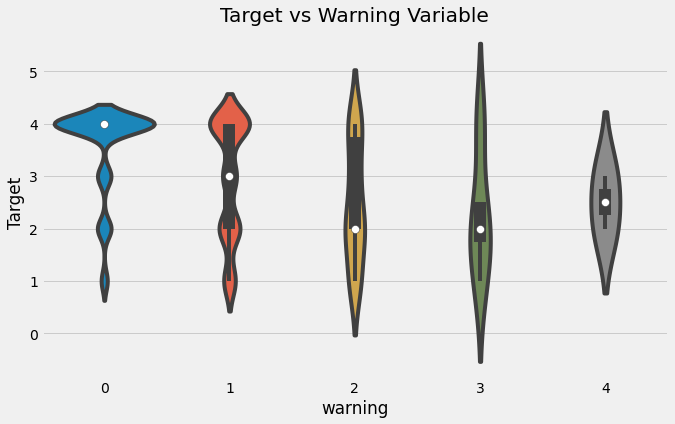

In [90]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads)
plt.title('Target vs Warning Variable')
# 경고가 적을수록 잘산다 

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


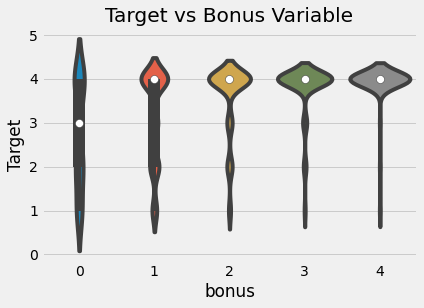

In [91]:
heads['bonus'] = 1 * (heads['refrig'] +  # 냉장고 여부
                      heads['computer'] + # 컴퓨터
                      (heads['v18q1'] > 0) + # 테블릿
                      heads['television']) # 텔레비전

sns.violinplot('bonus', 'Target', data = heads,
                figsize = (10, 6));
plt.title('Target vs Bonus Variable');
# 많을수록 잘산다 

In [92]:
# 가구원수 대비 각각 개수를 구함
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

In [93]:
from scipy.stats import spearmanr

In [94]:
def plot_corrs(x,y):
    
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0,1]
    
    data=pd.DataFrame({'x':x,'y':y})
    plt.figure(figsize=(6,4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

In [ ]:
x = np.array(range(100))
y = x **2 

In [103]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
# 위와 같은 방식으로 상관관계 나타냄 

pcorrs = pcorrs.rename(columns = {'index': 'feature'}) # index 이름 변경

In [96]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

feats=[]
scorr=[]
pvalues=[]

for c in heads:
    if heads[c].dtype != 'object':
        feats.append(c) # object 타입 아니면 추가 = feature
        
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation) # 상관관계 가져다씀
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue) # pvalue구해서 추가
        
scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')
# 3가지를 데이터 프레임으로 하는 scorrs 만들고 scorr 기준으로 정렬

In [98]:
print(scorrs.head()) # 스코어 높은거 5개 
print(scorrs.dropna().tail()) # 스코어 낮은거 5개 

        feature     scorr        pvalue
88      warning -0.307326  4.682829e-66
58   dependency -0.281516  2.792620e-55
75    hogar_nin -0.236225  5.567218e-39
70         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31
              feature     scorr        pvalue
85              floor  0.309638  4.466091e-67
90  phones-per-capita  0.337377  4.760104e-80
86    wlls+roof+floor  0.338791  9.539346e-81
87   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [104]:
corrs = pcorrs.merge(scorrs, on = 'feature') # pcorrs만들어 놓은거 추가 
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
# pcorr만들어 놓은거에서 scorr 만들어 놓은거 뺀다

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
69,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
77,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
79,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
87,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [105]:
corrs.sort_values('diff').tail()

,feature,pcorr,scorr,pvalue,diff
53,elec,0.024126,NaN,NaN,NaN
72,rent-per-capita,0.159568,NaN,NaN,NaN
73,v2a1,0.161353,NaN,NaN,NaN
91,meaneduc,0.333652,NaN,NaN,NaN
93,elimbasu5,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Target vs Dependency')

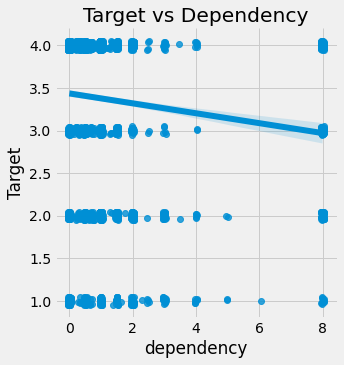

In [107]:
sns.lmplot('dependency','Target',fit_reg = True , data=train_heads,x_jitter=0.05,y_jitter=0.05)
plt.title('Target vs Dependency') # 의존도가 높을수록 가난 하다는 느낌을 줌 

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


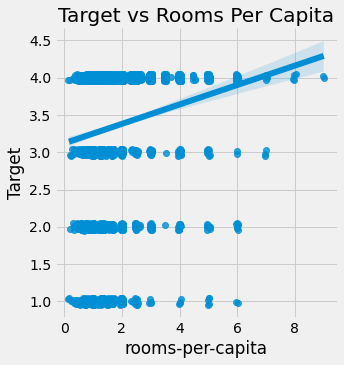

In [109]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');
# room 이 많을수록 부유함 

<AxesSubplot:>

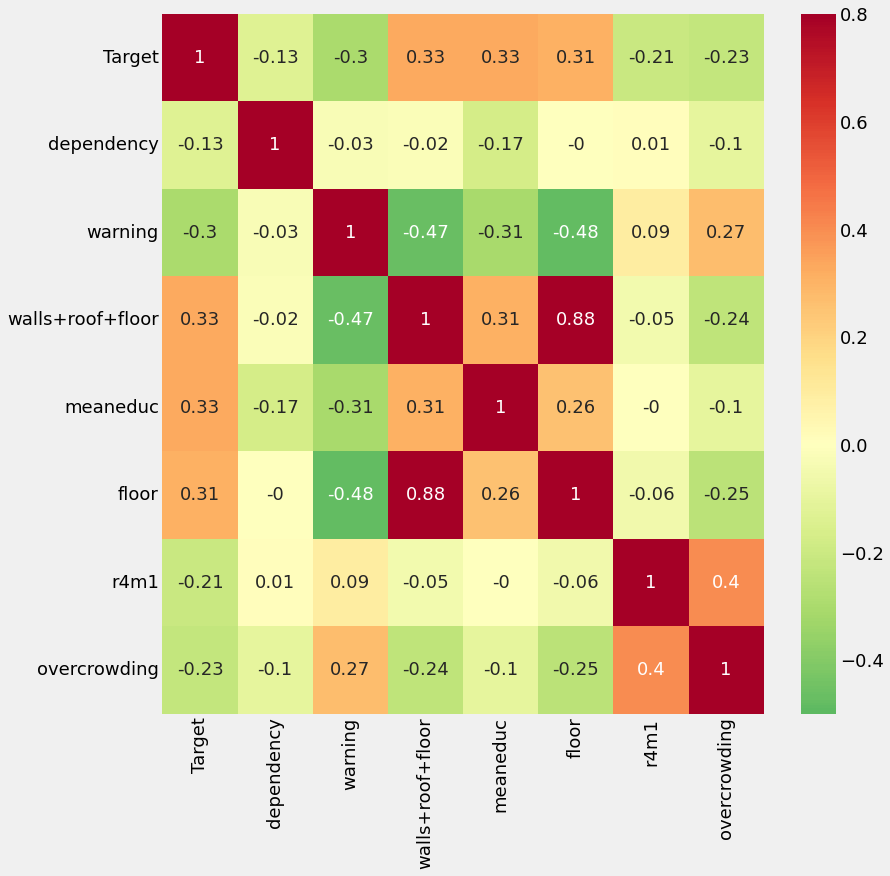

In [110]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size'] = 18
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,vmin=-0.5,vmax=0.8,center=0,cmap=plt.cm.RdYlGn_r,annot=True)

c:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnin

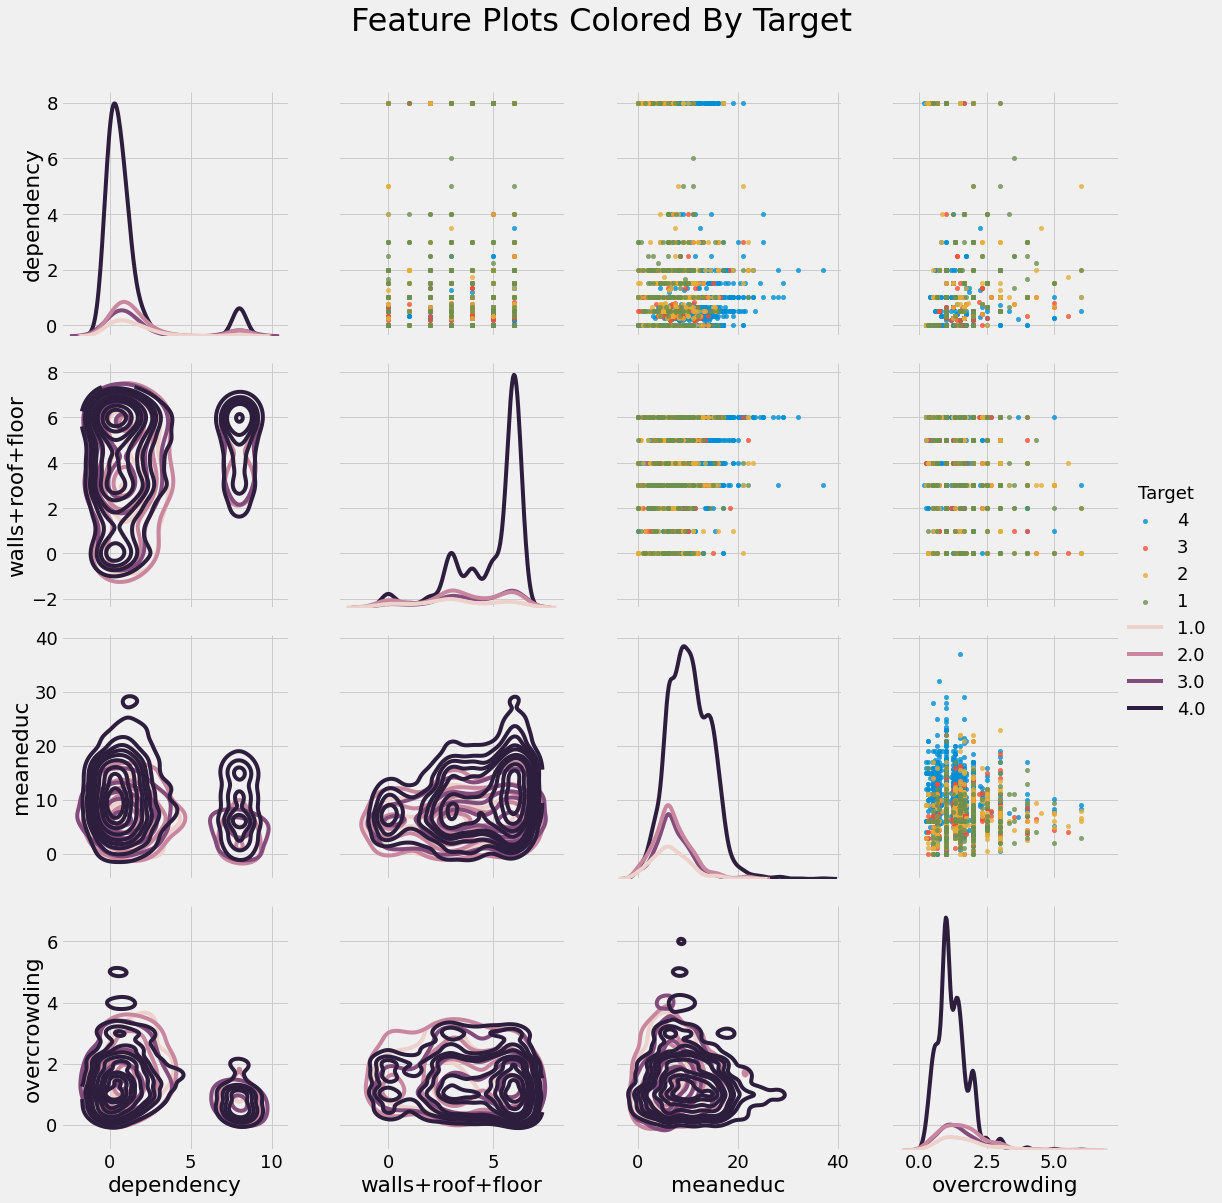

In [118]:
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

In [116]:
upper


,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
Target,NaN,-0.136275,-0.096313,0.068230,0.119607,0.254469,-0.078851,-0.104545,-0.209131,-0.096893,-0.152979,-0.040128,-0.039861,0.005231,0.275452,0.016832,-0.054463,-0.114144,-0.103487,0.014357,0.032872,-0.026240,0.031516,0.295249,0.062961,-0.046518,-0.055818,0.021908,-0.009437,-0.051036,-0.007696,-0.049932,0.097592,-0.062316,-0.083835,-0.017669,-0.054739,0.158804,-0.083063,-0.162796,0.156930,-0.060286,-0.142433,-0.041221,NaN,0.023812,-0.208170,-0.162652,0.280947,-0.209181,-0.128644,0.261142,-0.217908,-0.174310,0.293540,-0.022316,0.131069,0.032834,-0.109057,-0.095326,0.173324,0.137407,0.175124,-0.019746,-0.085646,-0.084516,-0.079679,-0.047958,0.089509,-0.089509,-0.133152,0.161353,-0.126465,0.235687,0.052310,0.333652,-0.234954,0.201019,-0.186530,0.086395,-0.023307,-0.209479,-0.038193,-0.142157,-0.260917,0.036476,-0.111489,0.197493,-0.111557,-0.122554,-0.111557,-0.266309,0.127904,-0.025173,-0.111557,0.135203,0.168685
hacdor,NaN,NaN,0.593867,-0.086701,-0.066409,-0.113787,0.026165,0.019816,0.110713,0.122610,0.068846,0.086632,-0.007015,-0.005960,-0.143259,-0.005960,0.026892,0.116650,0.026372,-0.036627,-0.007641,-0.008595,-0.006613,-0.148678,-0.036094,0.036627,0.005125,-0.004565,-0.003695,-0.002945,0.006355,0.064991,0.006987,-0.030309,0.053491,-0.007932,-0.012058,-0.035395,0.023407,0.033674,-0.060450,0.029765,0.051689,0.007229,-0.001652,-0.006817,0.146991,0.037738,-0.127219,0.112619,0.047893,-0.119760,0.151133,0.059861,-0.148503,-0.083256,-0.043135,0.046399,0.121261,0.072329,-0.054428,-0.041849,-0.054110,0.009782,0.027159,-0.008010,0.037814,0.030319,-0.009123,0.009123,0.116965,-0.019910,0.019191,-0.047917,-0.027628,-0.092837,0.620093,-0.197812,0.243406,0.050627,0.175272,0.219364,0.095605,0.191594,0.302703,0.099775,0.246122,-0.054685,0.246793,0.297433,0.246793,0.295757,0.043431,-0.058321,0.246793,-0.189177,0.026514
hacapo,NaN,NaN,NaN,-0.123276,-0.075336,-0.094350,0.022254,0.007634,0.089127,0.134901,0.042265,0.118369,-0.005219,-0.004434,-0.120922,-0.004434,-0.002458,0.115475,0.023931,-0.047382,-0.007023,-0.006394,-0.004920,-0.131246,-0.038001,0.035262,0.013710,-0.022503,-0.002749,0.002857,0.023222,0.105027,-0.013006,-0.027034,0.089556,-0.005901,0.002071,-0.028908,0.011194,0.042592,-0.056761,0.030683,0.045590,0.013695,-0.001229,-0.005071,0.133999,0.011774,-0.094734,0.112630,0.018830,-0.092966,0.153102,0.031874,-0.124185,-0.061334,-0.038374,0.030007,0.122973,0.050853,-0.039341,-0.035871,-0.055738,0.009390,0.029604,-0.005307,0.026064,0.041579,-0.012488,0.012488,0.097741,-0.019566,0.011497,-0.039651,-0.026451,-0.088360,0.467570,-0.200073,0.188811,0.056090,0.150316,0.170801,0.063220,0.140345,0.235222,0.082186,0.194963,-0.047469,0.195462,0.252206,0.195462,0.223288,0.046811,-0.043296,0.195462,-0.126525,0.036755
v14a,NaN,NaN,NaN,NaN,0.145417,0.065795,0.002527,0.007668,-0.020410,-0.128082,-0.068496,-0.034484,0.003483,0.002960,0.094633,0.002960,-0.057915,-0.140181,-0.076321,0.047145,0.012098,0.004268,0.003284,0.087430,0.169428,-0.110830,-0.178016,0.034658,0.001835,-0.096564,-0.000137,-0.460629,0.022767,0.082497,-0.135782,0.003939,-0.125215,0.037976,0.000772,-0.050813,0.068897,-